<a href="https://colab.research.google.com/github/Cill19/Customer-Behavior-Analysis-using-Decision-Tree/blob/main/stefany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tahap 1: Mengumpulkan data

Kode dibawah untuk mengimpor pustaka-pustaka yang diperlukan untuk analisis data dan visualisasi. `pandas` digunakan untuk manipulasi dan pengolahan data dalam bentuk tabel, `seaborn` untuk membuat visualisasi statistik yang lebih menarik, `matplotlib.pyplot` untuk grafik dasar seperti histogram dan scatterplot, serta `numpy` untuk operasi matematika dan manipulasi array yang efisien. Pustaka-pustaka ini sangat berguna dalam tahap awal analisis data untuk memudahkan eksplorasi dan visualisasi informasi.

In [2]:
#Import beberapa library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

kode di bawah untuk membaca dataset dari penyimpanan dengan membaca path file

In [3]:
#membaca data dari drive
dt = pd.read_csv('/content/dummy_data.csv')

In [ ]:
selanjutnya menampilkan data head dari dataset yang sudah di load

In [4]:
#Menampilkan 5 datasheet teratas
dt.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


## Tahap 2: Menelaah data

**Analisis Karakteristik Data**

In [5]:
#Cek tipe data
dt.dtypes

,0
age,int64
gender,object
time_spent,int64
platform,object
interests,object
location,object
demographics,object
profession,object
income,int64
indebt,bool


In [6]:
# Telaah data secara statistik deskriptif/rincian data
dt.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [9]:
#cek missing value
dt.isnull().sum()

,0
age,0
gender,0
time_spent,0
platform,0
interests,0
location,0
demographics,0
profession,0
income,0
indebt,0


In [10]:
#Identifikasi data unik dari atribut
dt.nunique()

,0
age,47
gender,3
time_spent,9
platform,3
interests,3
location,3
demographics,3
profession,3
income,955
indebt,2


In [11]:
#Proses pengecekan isi kategori dari atribut yang ada
categorical_col = []
for column in dt.columns:
    if dt[column].dtype == object and len(dt[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dt[column].unique()}")
        print("====================================")

gender : ['male' 'female' 'non-binary']
platform : ['Instagram' 'Facebook' 'YouTube']
interests : ['Sports' 'Travel' 'Lifestlye']
location : ['United Kingdom' 'Australia' 'United States']
demographics : ['Urban' 'Sub_Urban' 'Rural']
profession : ['Software Engineer' 'Student' 'Marketer Manager']


Kode di atas digunakan untuk memeriksa dan menampilkan isi kategori (nilai unik) dari setiap kolom dalam dataset yang memiliki tipe data objek (string). Dengan menggunakan loop, kode ini mengecek setiap kolom dan memastikan hanya kolom dengan tipe data objek dan jumlah kategori yang uniknya kurang dari atau sama dengan 50 yang diproses. Jika memenuhi kriteria tersebut, kolom tersebut ditambahkan ke dalam daftar `categorical_col`, dan nilai unik dari kolom tersebut akan ditampilkan. Hal ini membantu dalam memahami variabel kategorikal yang ada dalam dataset untuk analisis lebih lanjut atau pemrosesan data.

In [14]:
# Daftar kolom yang perlu diubah tipe datanya menjadi 'category'
categorical_columns = ['gender', 'platform', 'interests', 'location', 'demographics', 'profession']

# Menampilkan kolom yang akan diubah tipe datanya
print("Kolom yang akan diubah tipe datanya:", categorical_columns)

# Mengonversi kolom-kolom tersebut menjadi tipe data 'category'
for column in categorical_columns:
    dt[column] = dt[column].astype('category')

# Mengecek tipe data setelah perubahan
print(dt.dtypes)


Kolom yang akan diubah tipe datanya: ['gender', 'platform', 'interests', 'location', 'demographics', 'profession']
age                int64
gender          category
time_spent         int64
platform        category
interests       category
location        category
demographics    category
profession      category
income             int64
indebt              bool
isHomeOwner         bool
Owns_Car            bool
dtype: object


**Cek Distribusi / Keseimbangan Kelas**

In [16]:
# Cek distribusi untuk beberapa kolom sekaligus
columns_to_check = ['gender', 'platform', 'interests', 'location', 'demographics', 'profession']
for column in columns_to_check:
    print(f"Distribusi {column}:")
    print(dt[column].value_counts())
    print("="*50)


Distribusi gender:
gender
male          337
non-binary    332
female        331
Name: count, dtype: int64
Distribusi platform:
platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64
Distribusi interests:
interests
Lifestlye    341
Sports       331
Travel       328
Name: count, dtype: int64
Distribusi location:
location
Australia         352
United Kingdom    329
United States     319
Name: count, dtype: int64
Distribusi demographics:
demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64
Distribusi profession:
profession
Marketer Manager     355
Software Engineer    336
Student              309
Name: count, dtype: int64


**Memvisualkan distribusi masing-masing atribute** <br>
misal menampilkan status kredit

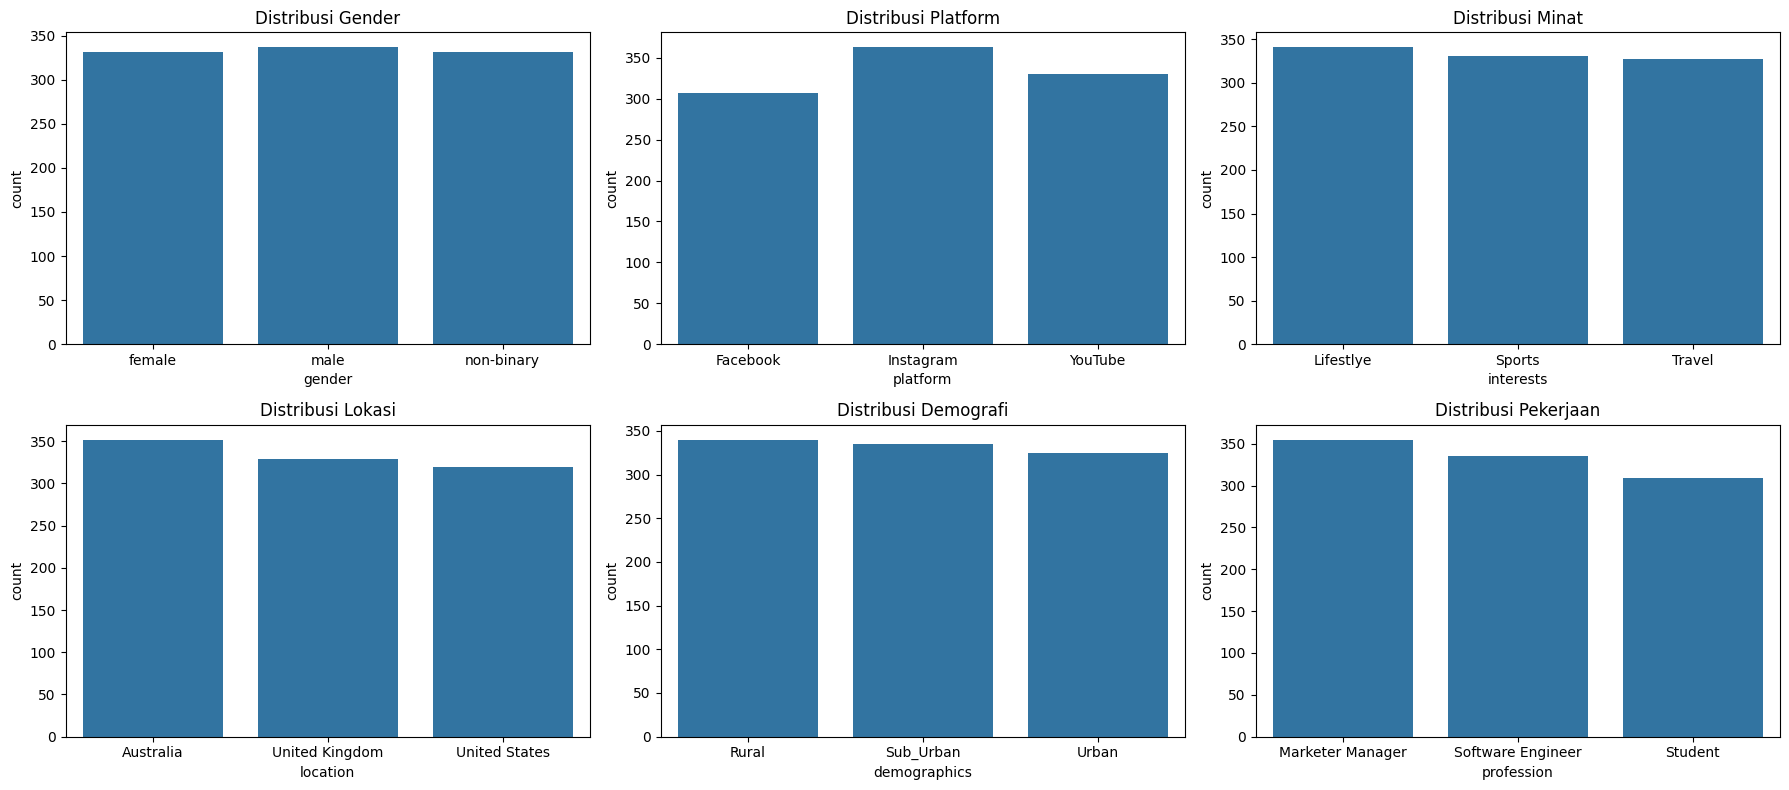

In [17]:
# Visualisasi distribusi kategori dengan barplot
plt.figure(figsize=(18, 8))

# Gender
plt.subplot(2, 3, 1)
sns.countplot(data=dt, x='gender')
plt.title('Distribusi Gender')

# Platform
plt.subplot(2, 3, 2)
sns.countplot(data=dt, x='platform')
plt.title('Distribusi Platform')

# Interests
plt.subplot(2, 3, 3)
sns.countplot(data=dt, x='interests')
plt.title('Distribusi Minat')

# Location
plt.subplot(2, 3, 4)
sns.countplot(data=dt, x='location')
plt.title('Distribusi Lokasi')

# Demographics
plt.subplot(2, 3, 5)
sns.countplot(data=dt, x='demographics')
plt.title('Distribusi Demografi')

# Profession
plt.subplot(2, 3, 6)
sns.countplot(data=dt, x='profession')
plt.title('Distribusi Pekerjaan')

plt.tight_layout()
plt.show()


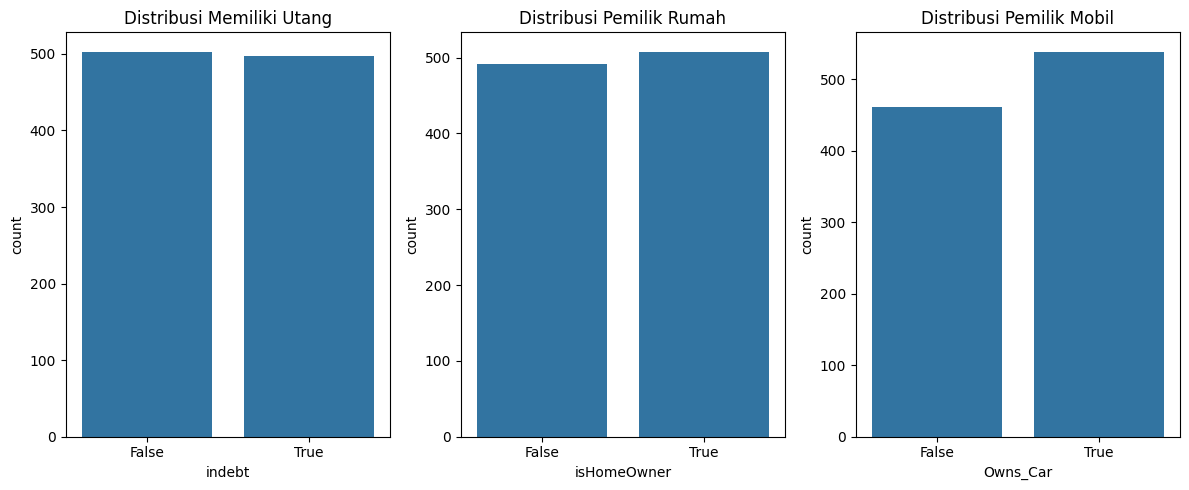

In [18]:
# Visualisasi distribusi kolom boolean
plt.figure(figsize=(12, 5))

# Memiliki Utang
plt.subplot(1, 3, 1)
sns.countplot(data=dt, x='indebt')
plt.title('Distribusi Memiliki Utang')

# Memiliki Rumah
plt.subplot(1, 3, 2)
sns.countplot(data=dt, x='isHomeOwner')
plt.title('Distribusi Pemilik Rumah')

# Memiliki Mobil
plt.subplot(1, 3, 3)
sns.countplot(data=dt, x='Owns_Car')
plt.title('Distribusi Pemilik Mobil')

plt.tight_layout()
plt.show()


## Tahap 3: Memilih Data, Membersihkan Data dan Validasi data

Dari proses di atas, ada proses validasi yang harus dilakukan, diantaranya : <br>
1. Validasi data kosong <br>
2. Validasi atribute yang kategori tidak konsisten (jenis kelamin <br>
3. Validasi data Outlier <br>

In [19]:
# Memeriksa apakah ada data kosong lagi
missing_data = dt.isnull().sum()

# Menampilkan kolom yang memiliki data kosong
print("Jumlah Missing Values pada setiap kolom:")
print(missing_data)


Jumlah Missing Values pada setiap kolom:
age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64


In [20]:
# Memeriksa nilai unik pada kolom gender
print("Nilai unik pada kolom 'gender':")
print(dt['gender'].unique())


Nilai unik pada kolom 'gender':
['male', 'female', 'non-binary']
Categories (3, object): ['female', 'male', 'non-binary']


In [22]:
# Mengonversi semua nilai menjadi konsisten (misalnya, lowercase)
dt['gender'] = dt['gender'].str.lower()

# Menampilkan nilai unik setelah diperbaiki
print("Nilai unik setelah normalisasi:")
print(dt['gender'].unique())


Nilai unik setelah normalisasi:
['male' 'female' 'non-binary']


In [23]:
# Mengganti nilai yang salah (jika ada kesalahan pengetikan)
dt['gender'] = dt['gender'].replace({'male': 'male', 'female': 'female', 'non-binary': 'non-binary'})


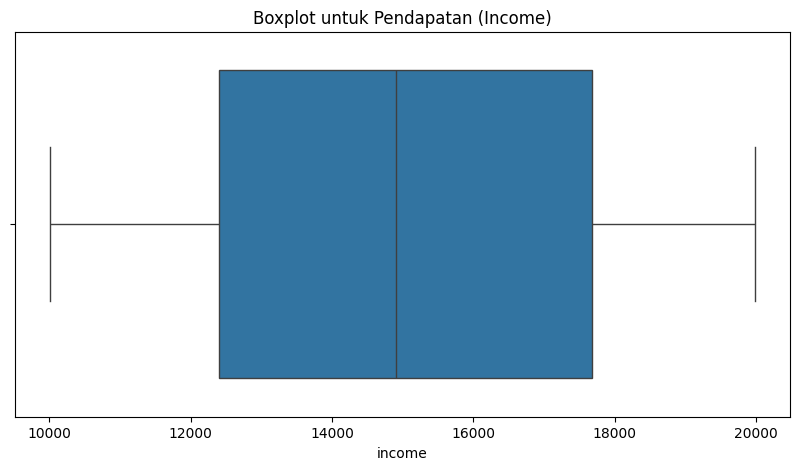

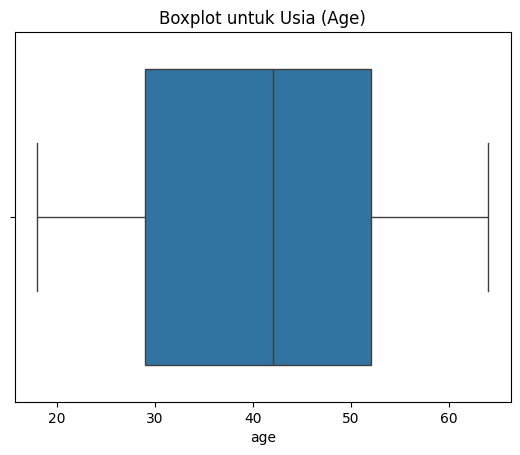

In [24]:
# Membuat boxplot untuk deteksi outlier pada kolom numerik
plt.figure(figsize=(10, 5))

# Boxplot untuk kolom 'income'
sns.boxplot(x=dt['income'])
plt.title('Boxplot untuk Pendapatan (Income)')
plt.show()

# Boxplot untuk kolom 'age'
sns.boxplot(x=dt['age'])
plt.title('Boxplot untuk Usia (Age)')
plt.show()


In [26]:
from scipy import stats

# Menghitung z-score untuk kolom numerik
z_scores = np.abs(stats.zscore(dt[['age', 'income']]))

# Menyaring outlier dengan z-score > 3
outliers = (z_scores > 3).all(axis=1)

# Menampilkan data yang dianggap outlier
outlier_data = dt[outliers]
print("Data yang dianggap outlier:")
print(outlier_data)


Data yang dianggap outlier:
Empty DataFrame
Columns: [age, gender, time_spent, platform, interests, location, demographics, profession, income, indebt, isHomeOwner, Owns_Car]
Index: []


In [27]:
# Menghapus outlier berdasarkan z-score
dt_clean = dt[~outliers]

# Menampilkan data yang sudah dibersihkan dari outlier
print("Dataset setelah menghapus outlier:")
print(dt_clean.head())


Dataset setelah menghapus outlier:
   age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0        Urban  Software Engineer   19774    True        False     False  
1        Urban            Student   10564    True         True      True  
2    Sub_Urban   Marketer Manager   13258   False        False     False  
3        Urban            Student   12500   False         True     False  
4        Urban  Software Engineer   14566   False         True      True  


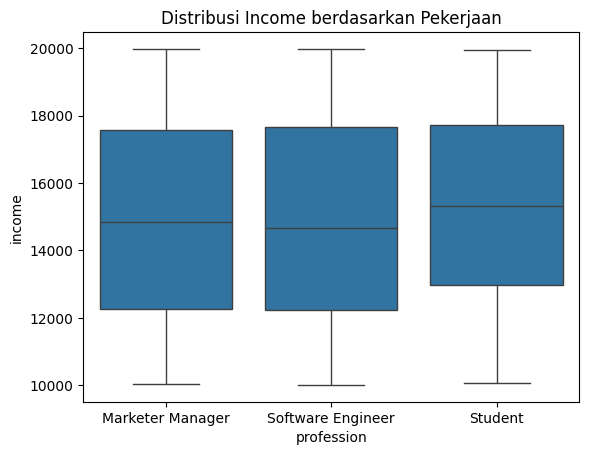

In [28]:
# Cek distribusi income berdasarkan pekerjaan
sns.boxplot(data=dt, x='profession', y='income')
plt.title('Distribusi Income berdasarkan Pekerjaan')
plt.show()


## Tahap 4: Menentukan Object data

In [29]:
# Menentukan target (dependent variable)
target_column = 'isHomeOwner'

# Menentukan fitur (independent variables)
features_columns = ['age', 'gender', 'time_spent', 'platform', 'interests', 'location', 'demographics', 'profession', 'income']


In [30]:
# One-Hot Encoding untuk kolom kategorikal
dt_encoded = pd.get_dummies(dt[features_columns], drop_first=True)

# Menampilkan hasil setelah encoding
print(dt_encoded.head())


   age  time_spent  income  gender_male  gender_non-binary  \
0   56           3   19774         True              False   
1   46           2   10564        False              False   
2   32           8   13258         True              False   
3   60           5   12500        False               True   
4   25           1   14566         True              False   

   platform_Instagram  platform_YouTube  interests_Sports  interests_Travel  \
0                True             False              True             False   
1               False             False             False              True   
2                True             False              True             False   
3                True             False             False              True   
4                True             False             False             False   

   location_United Kingdom  location_United States  demographics_Sub_Urban  \
0                     True                   False                   False

In [31]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengonversi kolom 'gender' menjadi numerik
dt['gender'] = le.fit_transform(dt['gender'])

# Menampilkan hasil setelah encoding
print(dt['gender'].head())


0    1
1    0
2    1
3    2
4    1
Name: gender, dtype: int64


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data numerik (misalnya kolom 'income' dan 'age')
scaler = MinMaxScaler()

# Mengubah 'income' dan 'age' menjadi rentang 0-1
dt[['income', 'age']] = scaler.fit_transform(dt[['income', 'age']])

# Menampilkan hasil normalisasi
print(dt[['income', 'age']].head())


     income       age
0  0.979334  0.826087
1  0.055377  0.608696
2  0.325642  0.304348
3  0.249599  0.913043
4  0.456862  0.152174


In [34]:
# Memisahkan data menjadi target dan fitur
X = dt[features_columns]  # Fitur
y = dt[target_column]  # Target

# Menampilkan bentuk data X dan y
print("Fitur (X):", X.shape)
print("Target (y):", y.shape)


Fitur (X): (1000, 9)
Target (y): (1000,)


## Tahap 5: Membersihkan data

In [35]:
# Menghapus baris yang mengandung missing values
dt_cleaned = dt.dropna()

# Mengecek dataset setelah penghapusan missing values
print("Jumlah data setelah menghapus missing values:", dt_cleaned.shape)


Jumlah data setelah menghapus missing values: (1000, 12)


In [36]:
# Mengisi missing values dengan nilai median untuk kolom numerik
dt['income'] = dt['income'].fillna(dt['income'].median())
dt['age'] = dt['age'].fillna(dt['age'].median())

# Mengecek missing values setelah imputasi
print("Jumlah missing values setelah imputasi:", dt.isnull().sum())


Jumlah missing values setelah imputasi: age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64


In [37]:
# Mengisi missing values pada kolom kategorikal dengan modus (nilai yang paling sering muncul)
dt['gender'] = dt['gender'].fillna(dt['gender'].mode()[0])

# Mengecek missing values setelah imputasi
print("Jumlah missing values setelah imputasi:", dt.isnull().sum())


Jumlah missing values setelah imputasi: age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64


In [38]:
# Mengecek duplikasi dalam dataset
duplicate_rows = dt[dt.duplicated()]

# Menampilkan jumlah baris yang terduplikasi
print("Jumlah duplikasi:", duplicate_rows.shape[0])

# Menampilkan beberapa duplikasi pertama
print(duplicate_rows.head())


Jumlah duplikasi: 0
Empty DataFrame
Columns: [age, gender, time_spent, platform, interests, location, demographics, profession, income, indebt, isHomeOwner, Owns_Car]
Index: []


In [40]:
# Menghapus baris duplikat
dt_cleaned = dt.drop_duplicates()

# Mengecek dataset setelah penghapusan duplikasi
print("Jumlah data setelah menghapus duplikasi:", dt_cleaned.shape)


Jumlah data setelah menghapus duplikasi: (1000, 12)


In [42]:
# Mengonversi kolom 'gender' menjadi tipe data string
dt['gender'] = dt['gender'].astype(str)

# Mengonversi nilai 'gender' menjadi lowercase
dt['gender'] = dt['gender'].str.lower()

# Memperbaiki data yang tidak konsisten
dt['gender'] = dt['gender'].replace({'mal': 'male', 'femal': 'female'})

# Menampilkan nilai unik pada kolom 'gender'
print("Nilai unik pada kolom 'gender':")
print(dt['gender'].unique())


Nilai unik pada kolom 'gender':
['1' '0' '2']


In [43]:
# Menormalkan penulisan dalam kolom 'platform' menjadi kapitalisasi yang benar
dt['platform'] = dt['platform'].str.capitalize()

# Memperbaiki data yang tidak konsisten pada kolom 'platform'
dt['platform'] = dt['platform'].replace({'you tube': 'YouTube', 'youTube': 'YouTube'})

# Menormalkan penulisan pada kolom 'location'
dt['location'] = dt['location'].str.title()

# Menampilkan nilai unik pada kolom 'platform' dan 'location'
print("Nilai unik pada kolom 'platform':")
print(dt['platform'].unique())

print("Nilai unik pada kolom 'location':")
print(dt['location'].unique())


Nilai unik pada kolom 'platform':
['Instagram' 'Facebook' 'Youtube']
Nilai unik pada kolom 'location':
['United Kingdom' 'Australia' 'United States']


In [44]:
# Mengecek apakah ada duplikasi dalam dataset
duplicate_rows = dt[dt.duplicated()]

# Menampilkan jumlah baris yang terduplikasi
print("Jumlah duplikasi:", duplicate_rows.shape[0])

# Menghapus duplikasi
dt_cleaned = dt.drop_duplicates()

# Mengecek jumlah data setelah duplikasi dihapus
print("Jumlah data setelah menghapus duplikasi:", dt_cleaned.shape)


Jumlah duplikasi: 0
Jumlah data setelah menghapus duplikasi: (1000, 12)


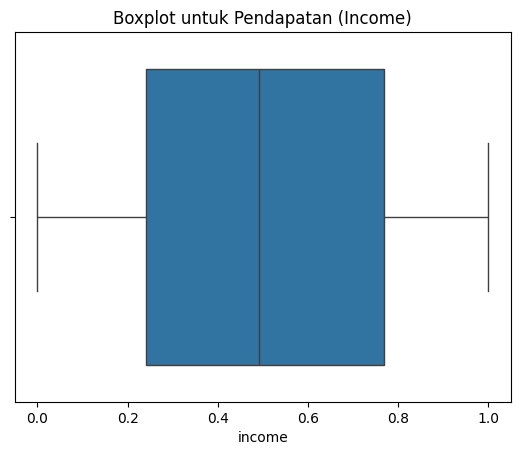

In [45]:
# Membuat boxplot untuk memvisualisasikan outlier pada kolom 'income'
sns.boxplot(x=dt['income'])
plt.title('Boxplot untuk Pendapatan (Income)')
plt.show()


In [46]:
# Memeriksa tipe data setiap kolom setelah pembersihan
print("Tipe data setelah pembersihan:")
print(dt_cleaned.dtypes)

# Memastikan tidak ada missing values
print("Missing values setelah pembersihan:", dt_cleaned.isnull().sum())

# Memastikan tidak ada duplikasi
print("Jumlah duplikasi setelah pembersihan:", dt_cleaned.duplicated().sum())


Tipe data setelah pembersihan:
age              float64
gender            object
time_spent         int64
platform          object
interests       category
location          object
demographics    category
profession      category
income           float64
indebt              bool
isHomeOwner         bool
Owns_Car            bool
dtype: object
Missing values setelah pembersihan: age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64
Jumlah duplikasi setelah pembersihan: 0


In [47]:
# Menyimpan dataset yang sudah dibersihkan
dt_cleaned.to_csv('/content/dummy_data_cleaned.csv', index=False)


## Tahap 6: Mengkonstruksi data

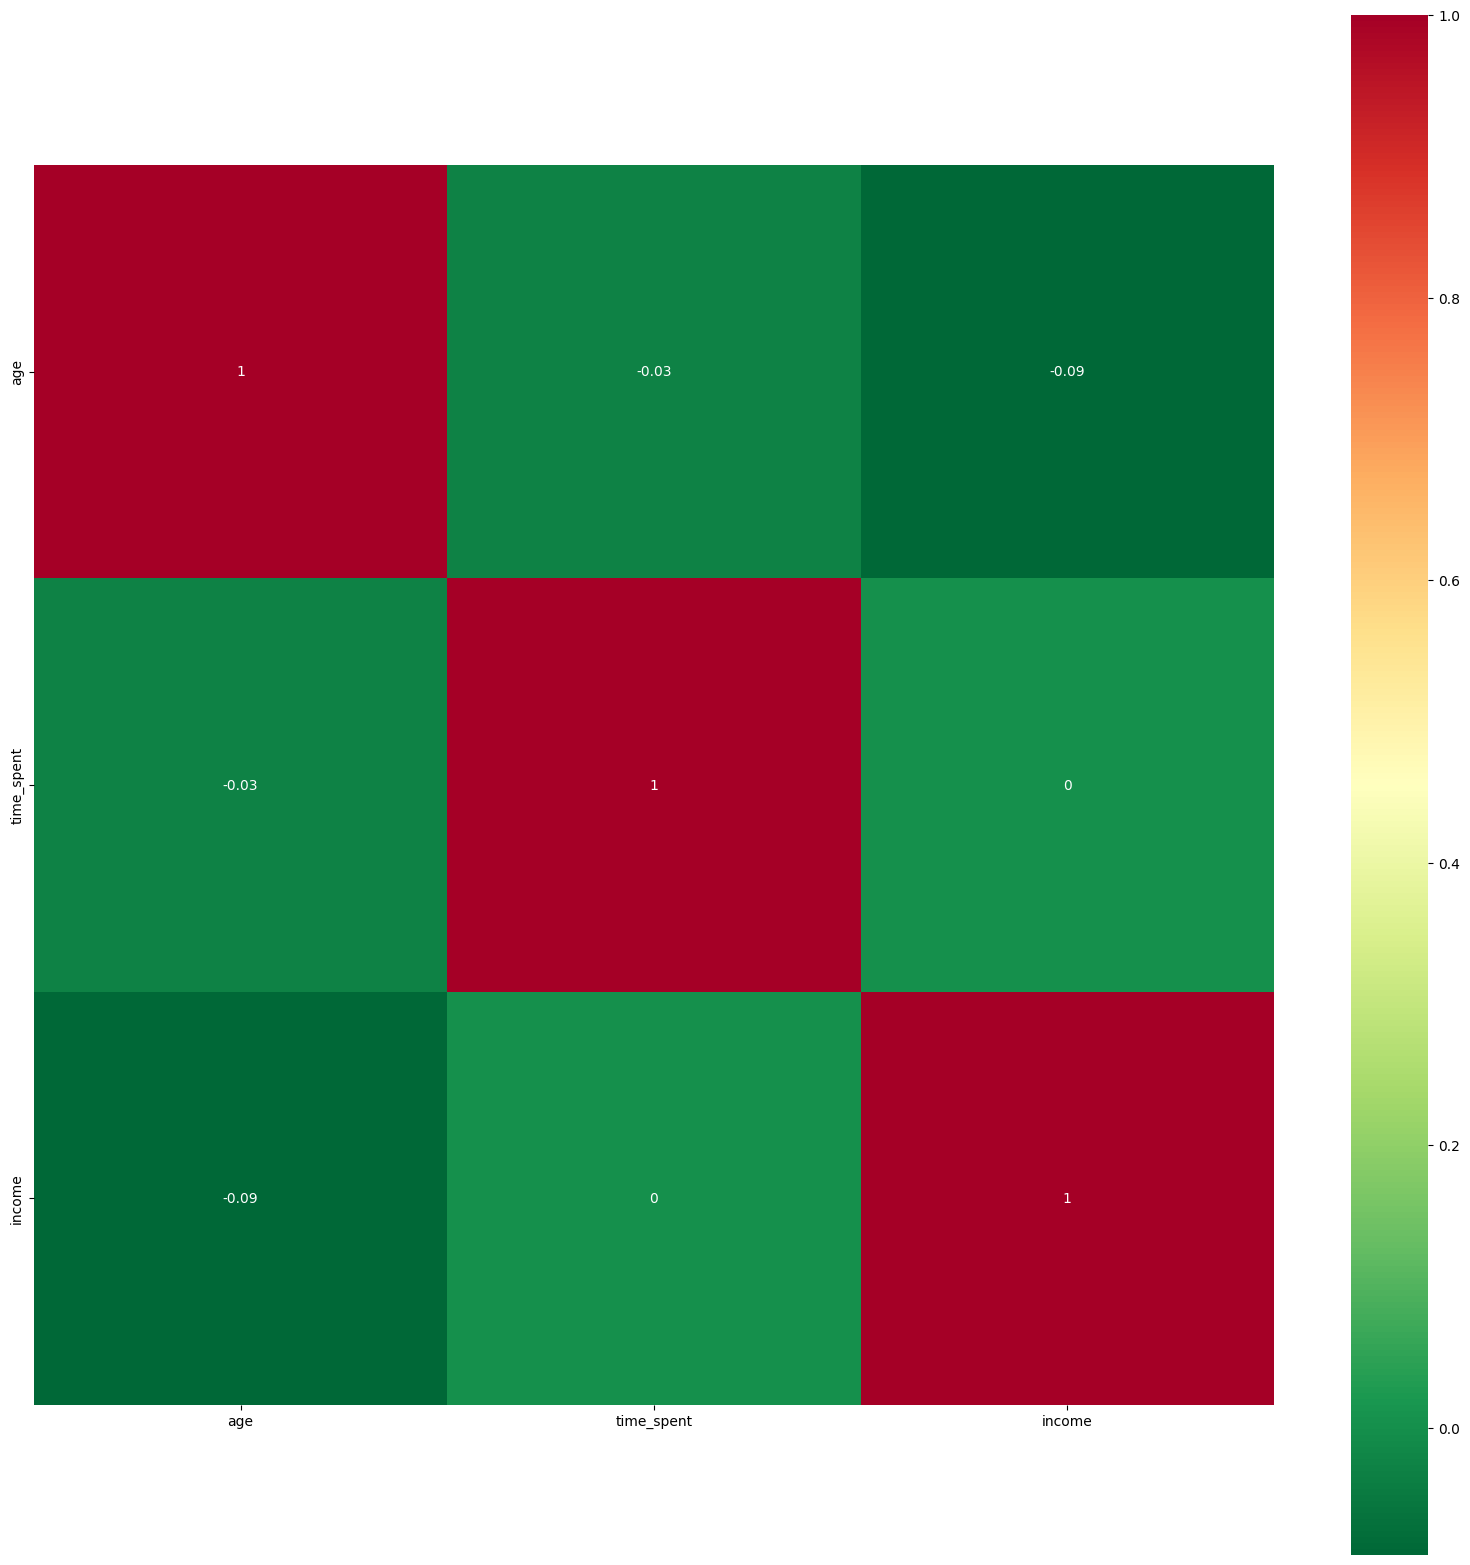

In [50]:
# Pilih hanya kolom numerik untuk perhitungan korelasi
dt_numerical = dt.select_dtypes(include=[np.number])

# Menghitung korelasi hanya pada kolom numerik
correlation = dt_numerical.corr()

# Visualisasi Korelasi
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation.round(2),
            annot=True,
            vmax=1,
            square=True,
            cmap='RdYlGn_r')
plt.show()


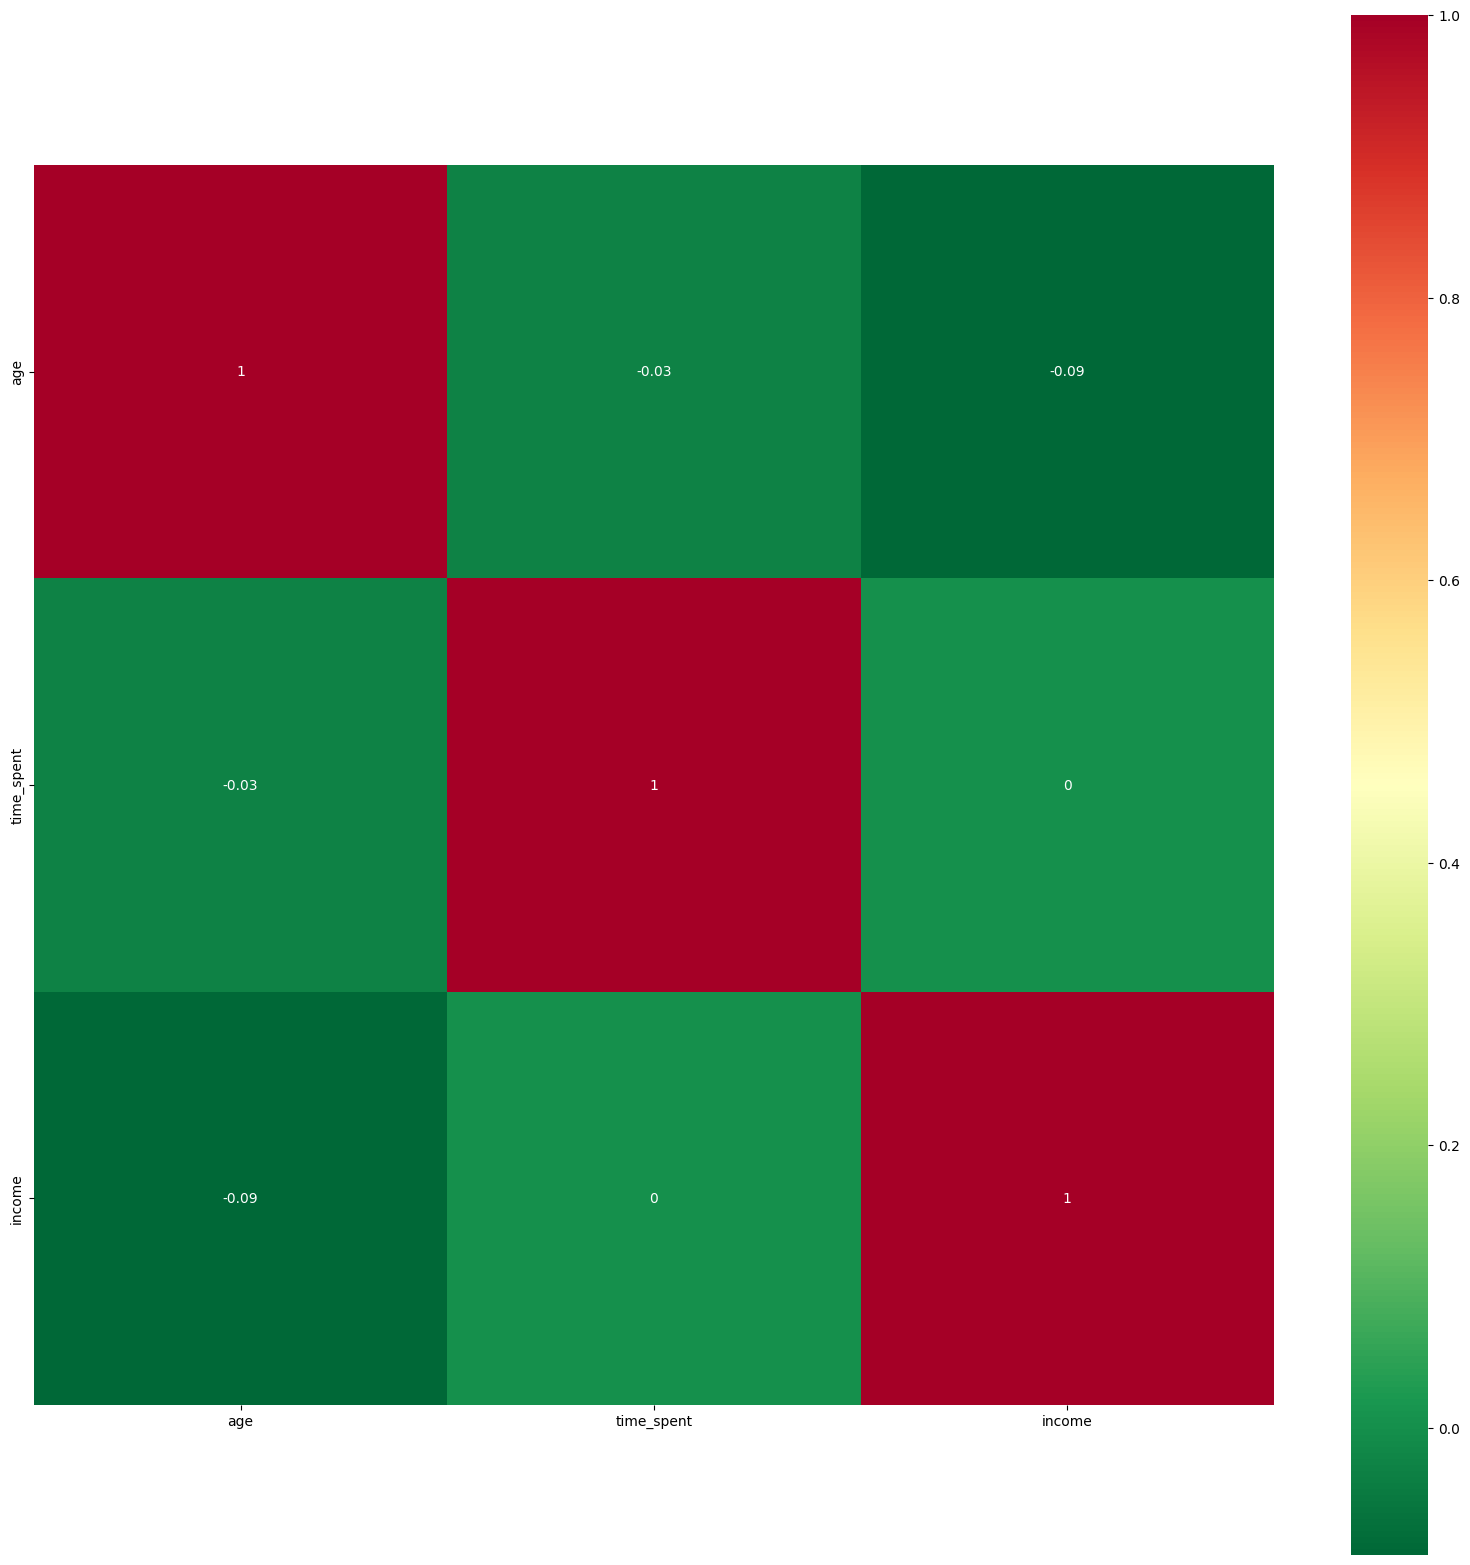

In [51]:
# Menghapus kolom non-numerik sebelum perhitungan korelasi
dt_cleaned = dt.select_dtypes(include=[np.number])

# Menghitung korelasi antar fitur numerik
correlation = dt_cleaned.corr()

# Visualisasi Korelasi
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation.round(2),
            annot=True,
            vmax=1,
            square=True,
            cmap='RdYlGn_r')
plt.show()


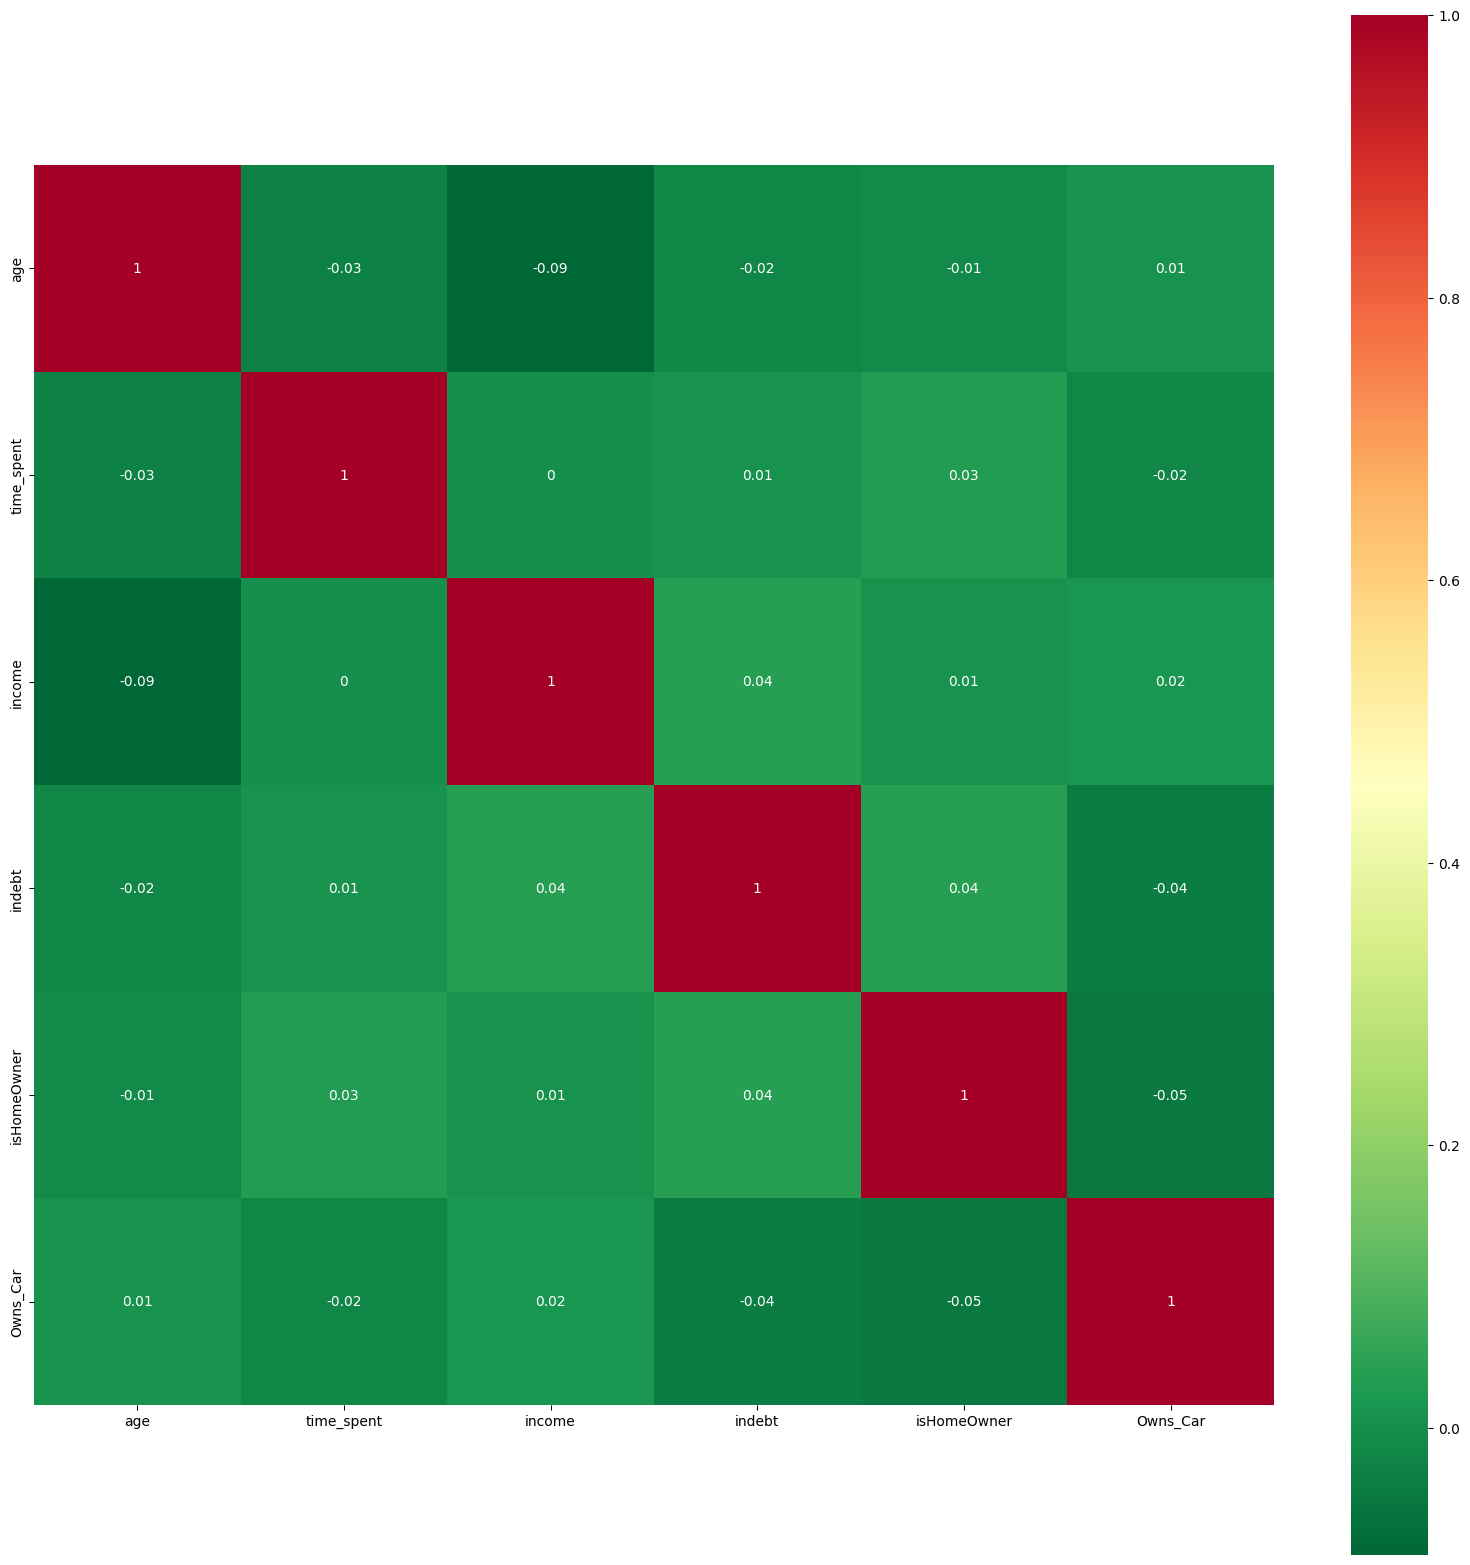

In [52]:
# Menghapus kolom non-numerik atau kolom tertentu sebelum perhitungan korelasi
dt_cleaned = dt.drop(columns=['gender', 'platform', 'interests', 'location', 'demographics', 'profession'])

# Menghitung korelasi antar fitur numerik setelah penghapusan
correlation = dt_cleaned.corr()

# Visualisasi Korelasi
plt.subplots(figsize=(20, 20))
sns.heatmap(correlation.round(2),
            annot=True,
            vmax=1,
            square=True,
            cmap='RdYlGn_r')
plt.show()


## Tahap 7: Menentukan Feature dan Label Data

In [53]:
# Menentukan target, misalnya kolom 'Owns_Car' sebagai target
target = 'Owns_Car'

In [54]:
X = dt.loc[:, dt.columns != target]  # Memilih semua kolom kecuali kolom target
y = dt.loc[:, dt.columns == target]  # Memilih kolom target

In [55]:
X

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner
0,0.826087,1,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,0.979334,True,False
1,0.608696,0,2,Facebook,Travel,United Kingdom,Urban,Student,0.055377,True,True
2,0.304348,1,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,0.325642,False,False
3,0.913043,2,5,Instagram,Travel,United Kingdom,Urban,Student,0.249599,False,True
4,0.152174,1,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,0.456862,False,True
...,...,...,...,...,...,...,...,...,...,...,...
995,0.086957,0,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,0.855136,False,True
996,0.478261,2,6,Youtube,Travel,United Kingdom,Rural,Software Engineer,0.270766,True,False
997,0.195652,2,5,Youtube,Travel,United Kingdom,Rural,Student,0.760734,True,False
998,0.934783,0,4,Youtube,Sports,Australia,Sub_Urban,Marketer Manager,0.628110,True,True


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # Mengonversi nilai target menjadi numerik


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [58]:
# Memisahkan data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# Menampilkan bentuk (shape) dari data training dan testing
print('X train = ', X_train.shape)
print('X test = ', X_test.shape)
print('Y train = ', Y_train.shape)
print('Y test = ', Y_test.shape)

X train =  (700, 11)
X test =  (300, 11)
Y train =  (700,)
Y test =  (300,)


## Tahap 8: Membangun Skenario Model

**Menyiapkan library untuk model klasifikasi tree** <br>

In [59]:
from sklearn.tree import DecisionTreeClassifier

**Menyiapkan library untuk model evaluas performance dengan Confusion metrik**

In [60]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics

## Tahap 8: Membangun Model

In [63]:

# Menentukan target (misalnya 'Owns_Car')
target = 'Owns_Car'

# Memisahkan fitur (X) dan target (y)
X = dt.loc[:, dt.columns != target]  # Semua kolom kecuali target
y = dt.loc[:, dt.columns == target]  # Kolom target

# Label Encoding untuk kolom target (Owns_Car)
le = LabelEncoder()
y = le.fit_transform(y)  # Mengonversi nilai target menjadi numerik

# One-Hot Encoding untuk variabel kategori dalam X
X = pd.get_dummies(X, drop_first=True)  # Drop first untuk menghindari multicollinearity

# Membagi data menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# Menentukan model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Melatih model dengan data training
model.fit(X_train, Y_train)

# Membuat prediksi dengan data testing
predictions = model.predict(X_test)

# Menghitung confusion matrix untuk mengevaluasi model
confusion_array = confusion_matrix(Y_test, predictions)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_array)




Confusion Matrix:
[[69 66]
 [96 69]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Tahap 9: Evaluasi Hasil Pemodelan

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung confusion matrix
confusion_array = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(confusion_array)


Confusion Matrix:
[[69 66]
 [96 69]]


In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Precision, Recall, F1-Score untuk klasifikasi biner
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
accuracy = accuracy_score(Y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Akurasi: {accuracy:.2f}")


Precision: 0.51
Recall: 0.42
F1-Score: 0.46
Akurasi: 0.46


In [67]:
# Menampilkan classification report
print("Classification Report:")
print(classification_report(Y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       135
           1       0.51      0.42      0.46       165

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300



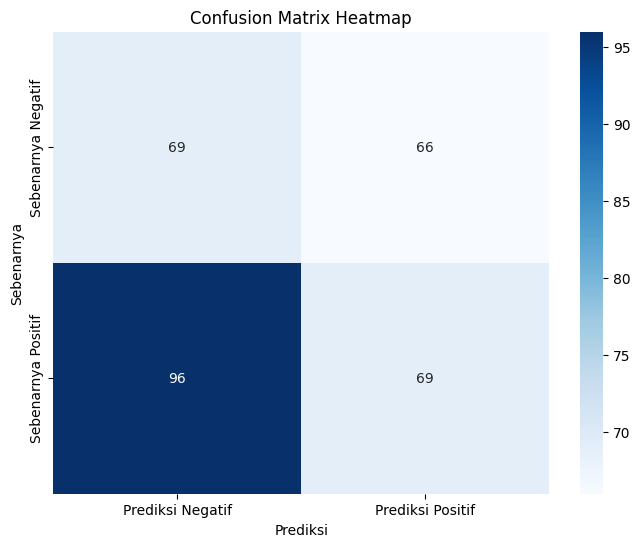

In [69]:


# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_array, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Negatif', 'Prediksi Positif'], yticklabels=['Sebenarnya Negatif', 'Sebenarnya Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Tahap 10: Melakukan Proses Review Pemodelan

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from io import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import os

In [71]:
# Menghitung confusion matrix
confusion_array = confusion_matrix(Y_test, predictions)

# Menampilkan nilai dari confusion matrix
print('True Negative (TN) = ', confusion_array[0, 0])  # True Negative
print('False Negative (FN) = ', confusion_array[1, 0])  # False Negative
print('True Positive (TP) = ', confusion_array[1, 1])  # True Positive
print('False Positive (FP) = ', confusion_array[0, 1])  # False Positive

True Negative (TN) =  69
False Negative (FN) =  96
True Positive (TP) =  69
False Positive (FP) =  66


In [72]:
# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

# Visualisasi pohon keputusan (untuk model pohon keputusan)
# Jika kamu menggunakan Graphviz pada Windows, pastikan path Graphviz sudah ditambahkan
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'



Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       135
           1       0.51      0.42      0.46       165

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300



In [73]:
# Ekspor pohon keputusan ke dalam format yang dapat dibaca
out = StringIO()
tree.export_graphviz(model, out_file=out,
                     feature_names=X.columns,  # Menyertakan nama fitur
                     class_names=['Not Interested', 'Interested'],  # Menyertakan nama kelas
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(out.getvalue())

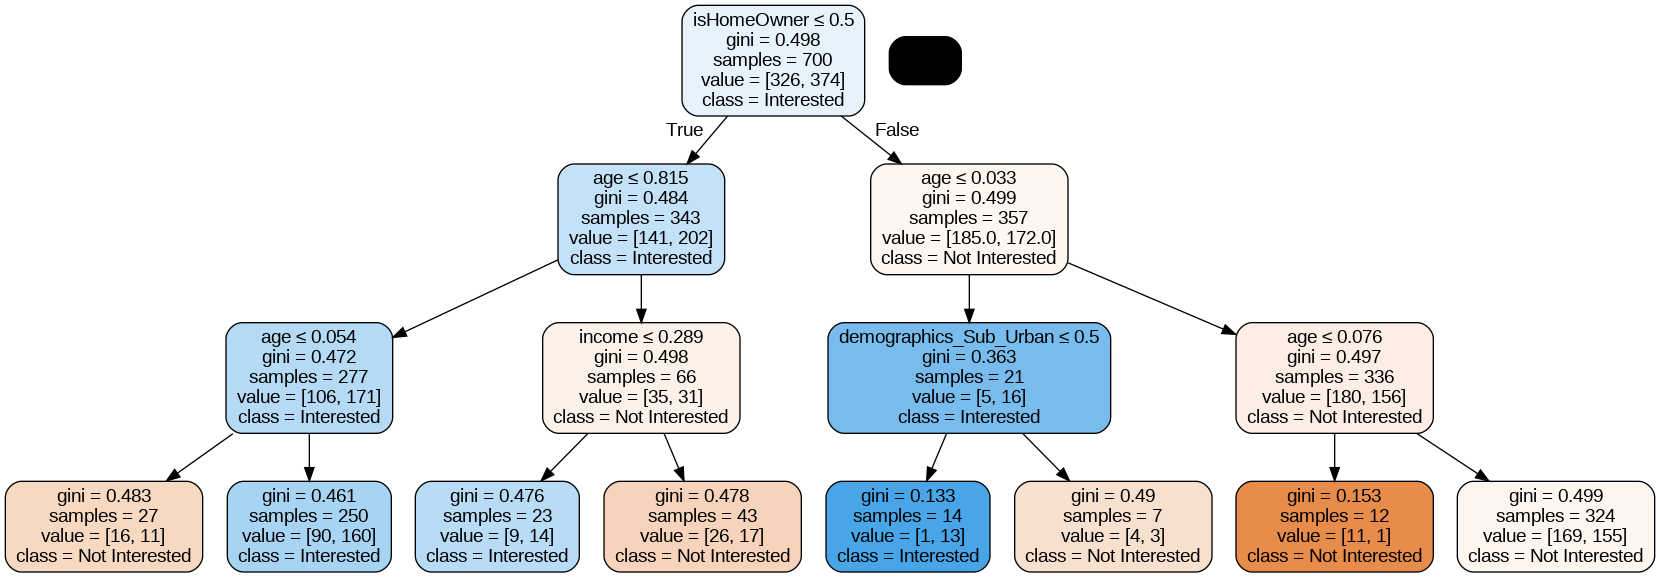

In [74]:
# Menampilkan visualisasi pohon keputusan
Image(graph.create_png())

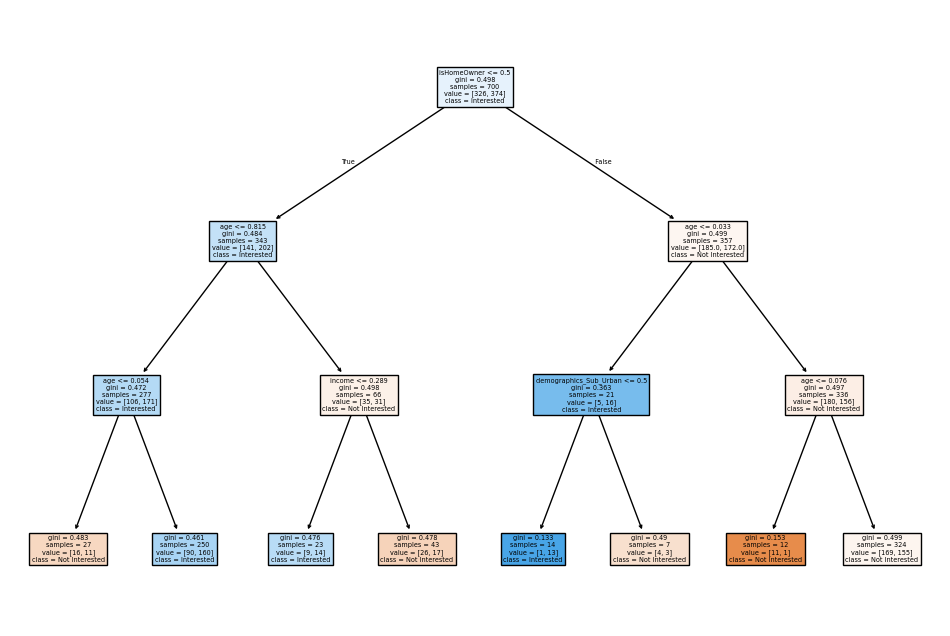

In [75]:
# Menampilkan pohon keputusan dalam bentuk plot
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Not Interested', 'Interested'], filled=True)
plt.show()